# CNN implementation on Dementia Dataset

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import cv2 as cv
import os, sys

In [8]:
path1='./Dementia Dataset/Dementia'
path2='./Dementia Dataset/Normal'
files1=os.listdir(path1)
files2=os.listdir(path2)
Num_files_N=len(files1)
Num_files_D=len(files2)
dataset_len=Num_files_N+Num_files_D

In [9]:
name=path1+'/'+files1[0]
img=cv.imread(name)
img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
img_gs_r=cv.resize(img_gs,(100,100))

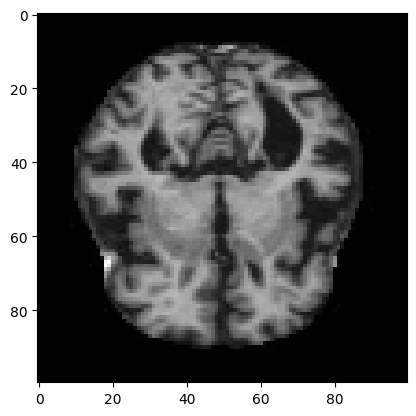

In [10]:
plt.imshow(img_gs_r,cmap='gray')

# Dataset Creation

For every file

1. Read the image
2. Convert it to grayscale (Optional)
3. Resize to (100,100)
4. Preprocessing: Normalization
5. Reshape to (100,100,1)
6. Create the dataset

In [11]:
data=np.zeros((dataset_len,100,100,1))
label=[]
data.shape

(200, 100, 100, 1)

In [12]:
for i in range(Num_files_N):
    name=path1+'/'+files1[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i,:,:]=img_gs
    label.append('Normal')


In [13]:
for i in range(Num_files_D):
    name=path2+'/'+files2[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    img_gs=img_gs.reshape(100,100,1)
    data[i+Num_files_N,:,:]=img_gs
    label.append('Dementia')


Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lab=le.fit_transform(label)

In [15]:
label

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',

In [16]:
lab

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Train and test dataset spilt

In [17]:
train_images,test_images,train_labels,test_labels=train_test_split(data,lab,test_size=0.2, random_state=1)

In [18]:
train_labels

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1], dtype=int64)

In [19]:
print('Train Dataset Size:',np.size(train_labels))
print('Test Dataset Size:',np.size(test_labels))

Train Dataset Size: 160
Test Dataset Size: 40


In [20]:
np.unique(test_labels,return_counts=True)

(array([0, 1], dtype=int64), array([17, 23], dtype=int64))

# Define the CNN architecture

Create the convolutional base

1. Convolutional : 32 filters 3x3
2. Maxpooling: 2x2
3. Convolutional : 64 filters 5x5
4. Convolutional : 32 filters 3x3
5. Maxpooling: 3x3


In [21]:
network=models.Sequential()
network.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(100,100,1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(7,7),activation='relu'))
network.add(layers.Conv2D(32,(3,3),activation='relu'))
network.add(layers.MaxPooling2D((3,3)))

Check summary of convolutional base

In [22]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 43, 43, 64)        100416    
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
Total params: 119200 (465.62 KB)
Trainable params: 11920

Build the classifier on top of the convolutional base

In [23]:
network.add(layers.Flatten())
network.add(layers.Dense(80,activation='relu'))
network.add(layers.Dense(50,activation='relu'))
network.add(layers.Dense(2,activation='softmax'))

In [24]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 43, 43, 64)        100416    
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 5408)              0

Compile and train the model

In [25]:
network.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
trained_network=network.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
5/5 [==============================] - 2s 345ms/step - loss: 0.6919 - accuracy: 0.5188 - val_loss: 0.7009 - val_accuracy: 0.4250
Epoch 2/5
5/5 [==============================] - 1s 284ms/step - loss: 0.6902 - accuracy: 0.5188 - val_loss: 0.6997 - val_accuracy: 0.4250
Epoch 3/5
5/5 [==============================] - 1s 282ms/step - loss: 0.6885 - accuracy: 0.5188 - val_loss: 0.6990 - val_accuracy: 0.4250
Epoch 4/5
5/5 [==============================] - 1s 287ms/step - loss: 0.6874 - accuracy: 0.5188 - val_loss: 0.6975 - val_accuracy: 0.4250
Epoch 5/5
5/5 [==============================] - 1s 283ms/step - loss: 0.6859 - accuracy: 0.5188 - val_loss: 0.6980 - val_accuracy: 0.4250


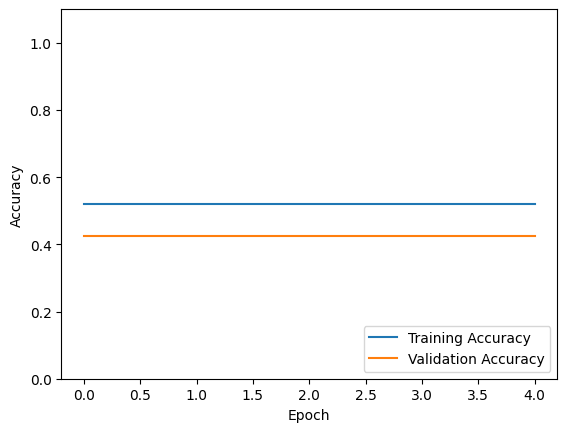

In [27]:
plt.plot(trained_network.history['accuracy'],label='Training Accuracy')
plt.plot(trained_network.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1.1])
plt.legend(loc='lower right')

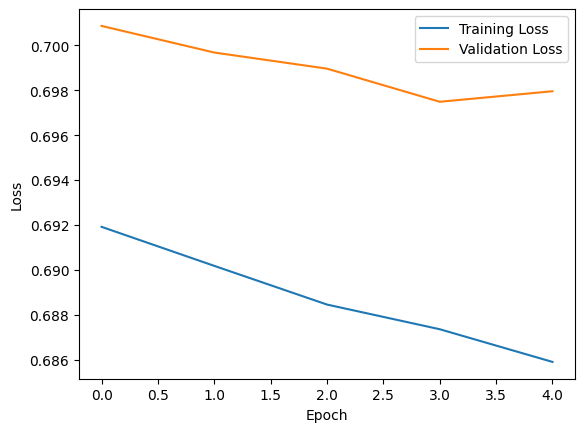

In [28]:
plt.plot(trained_network.history['loss'],label='Training Loss')
plt.plot(trained_network.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

Evaluate the network

In [29]:
test_loss,test_acc=network.evaluate(test_images,test_labels)

2/2 [==============================] - 0s 19ms/step - loss: 0.6980 - accuracy: 0.4250


In [30]:
y_predict=network.predict(test_images)

2/2 [==============================] - 0s 19ms/step


In [31]:
y_predict

array([[0.53991765, 0.46008238],
       [0.5256694 , 0.4743306 ],
       [0.5264347 , 0.47356525],
       [0.5465042 , 0.4534958 ],
       [0.55157316, 0.4484268 ],
       [0.53291756, 0.4670824 ],
       [0.52985704, 0.47014296],
       [0.5237547 , 0.47624528],
       [0.5312203 , 0.46877977],
       [0.5435859 , 0.45641413],
       [0.54056245, 0.45943752],
       [0.52933854, 0.47066143],
       [0.54133886, 0.4586611 ],
       [0.53485423, 0.4651458 ],
       [0.54232055, 0.45767942],
       [0.5387065 , 0.46129352],
       [0.5487599 , 0.45124015],
       [0.52396286, 0.4760371 ],
       [0.5425283 , 0.45747176],
       [0.53756696, 0.46243307],
       [0.5364572 , 0.46354282],
       [0.5387795 , 0.46122047],
       [0.5391626 , 0.4608374 ],
       [0.52553433, 0.4744657 ],
       [0.5334984 , 0.4665016 ],
       [0.54551095, 0.454489  ],
       [0.5292593 , 0.47074062],
       [0.53989244, 0.4601076 ],
       [0.5391146 , 0.46088538],
       [0.53867865, 0.46132138],
       [0.

In [32]:
y_pred=[]
for val in y_predict:
    y_pred.append(np.argmax(val))

In [33]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [34]:
print(metrics.confusion_matrix(test_labels,y_pred))

[[17  0]
 [23  0]]


In [35]:
print(metrics.accuracy_score(test_labels,y_pred))

0.425
